In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn

# Definitions (any d)

In [2]:
def u(X, X0,sigma):
    X = np.array(X)
    X0 = np.array(X0) 
    return 1. - np.exp(-np.linalg.norm(X-X0)**2/2/sigma)

In [3]:
def U(X,A_list,Sigma_list):
    p = np.prod(
    [u(X,A_list[i],Sigma_list[i]) for i in range(len(A_list))]
    )
    return p 


$$
\vec\nabla U(x) = 
\sum_{i=1}^{r} \left(  \prod_{j\neq i=1}^{r} u^{(j)}(x)   \right) 
\vec\nabla u^{(i)}(x)
$$

with

$$
\vec\nabla u^{(i)}(x) = 
-\frac{1}{\sigma^2} [u^{(i)}(x)-1] (\vec{x}-\vec{a}^{(i)})
$$

In [4]:
def Ugrad (X,A_list,Sigma_list):
   
    d = len(X)
    r = len(A_list)
    
    Ugrad = np.array([0. for i in range(d)])

    for i in range(r):
    
        fact1 = -1./pow(Sigma_list[i],2)
        fact2 = u(X, A_list[i],Sigma_list[i])-1
        vec = np.array(X) - np.array(A_list[i])
        grad_i = fact1*fact2*vec

        jlist = [j for j in range(r) if j != i]    
        prod_i = np.prod([ u(X, A_list[j],Sigma_list[j]) for j in jlist])
    
        Ugrad = Ugrad + prod_i * grad_i
    
    return Ugrad

# Runs (hardcoded in d = 2, 3)

In [5]:
#Example:

X = [-1,0]

A0 = [0,0]
A1 = [-2,3]
A2 = [-2,-1]

A_list = np.array([A0,A1,A2])

sigma0, sigma1, sigma2 = 1, 1, .5

Sigma_list = np.array([sigma0, sigma1, sigma2])

print(U(X,A_list,Sigma_list))
print(Ugrad(X,A_list,Sigma_list))

0.337926677709438
[-0.30705365  0.20468881]


In [6]:
#select random positions in 2D

m = 1000
x1min, x1max = -4 , 4
x2min, x2max = -4 , 4

X = np.array([[rn.uniform(x1min, x1max),rn.uniform(x2min, x2max)] for i in range(m)])

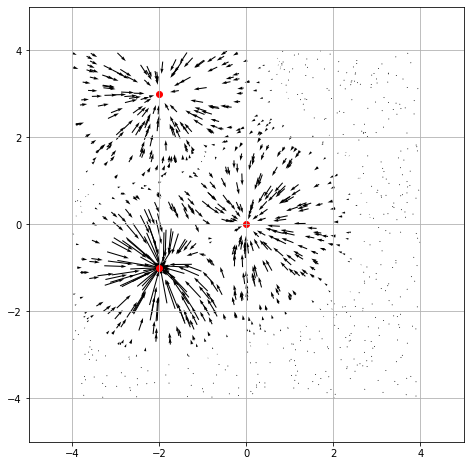

In [7]:
plt.rcParams["figure.figsize"] = (8,8)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Vector origin location
X0 = X[:,0]
X1 = X[:,1]
  
# gradients
grad_list = np.array([Ugrad(X[k],A_list,Sigma_list) for k in range(m)])
G0 = -grad_list[:,0]
G1 = -grad_list[:,1]



# Creating plot
plt.quiver(X0, X1, G0, G1, color='k', units='xy', scale=2)

#Attractors
plt.scatter(A_list[:,0],A_list[:,1],c='r')

# x-lim and y-lim
plt.xlim(-5,5)
plt.ylim(-5,5)
  
# Show plot with grid
plt.grid()
plt.show()

In [12]:
X = [-1,0,1]

A0 = [0,0,1]
A1 = [-2,3,-1]
A2 = [-2,-1,3]

A_list = np.array([A0,A1,A2])

sigma0, sigma1, sigma2 = 1, 1, .5

Sigma_list = np.array([sigma0, sigma1, sigma2])

print(U(X,A_list,Sigma_list))
print(Ugrad(X,A_list,Sigma_list))

0.3921361190785917
[-0.6002199   0.00282397 -0.00707957]


In [13]:
Ugrad(X,A_list,Sigma_list)[0]

-0.6002199044300356

In [130]:
#Attractors
A0 = [-2,-3,-3]
A1 = [-1,-2,-1]
A2 = [0,0,3]
A_list = np.array([A0,A1,A2])

#Sigmas
sigma0, sigma1, sigma2 = 1, 1, .5
Sigma_list = np.array([sigma0, sigma1, sigma2])


#select random positions in 3D
m = 500
x0min, x0max = -4 , 4
x1min, x1max = -4 , 4
x2min, x2max = -4 , 4
X = np.array([[rn.uniform(x0min, x0max),rn.uniform(x1min, x1max),rn.uniform(x2min, x2max)] for i in range(m)])

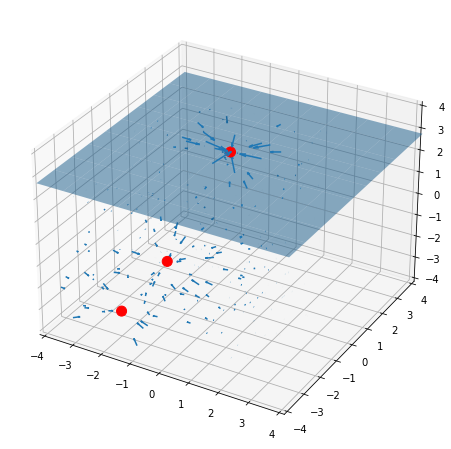

In [131]:
from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()




ax = plt.axes(projection = '3d')
ax.set_xlim([-4,4]);
ax.set_ylim([-4,4]);
ax.set_zlim([-4,4]);

scale_factor = .5

for i in range(len(X)):
    x0 = X[i,0]
    x1 = X[i,1]
    x2 = X[i,2]
    v0 = - scale_factor * Ugrad(X[i],A_list,Sigma_list)[0]
    v1 = - scale_factor * Ugrad(X[i],A_list,Sigma_list)[1]
    v2 = - scale_factor * Ugrad(X[i],A_list,Sigma_list)[2]
    ax.quiver(x0,x1,x2,v0,v1,v2)

# attractors
att = [A_list[:,0],A_list[:,1],A_list[:,2]]
ax.scatter(att[0],att[1],att[2],color = 'red',marker = 'o',s = 100,alpha = 1)


#plane

point  = np.array([-6,-6,-1])
normal = np.array([0, 0, 1])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(-7,3,1), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface

ax.plot_surface(xx, yy, z,alpha = 0.5)
plt.savefig('3dv0.pdf')
plt.show()


In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Vector origin location
X0 = X[:,0]
X1 = X[:,1]
  
# gradients
grad_list = np.array([Ugrad(X[k],A_list,Sigma_list) for k in range(m)])
G0 = -grad_list[:,0]
G1 = -grad_list[:,1]



# Creating plot
plt.quiver(X0, X1, G0, G1, color='k', units='xy', scale=2)

#Attractors
plt.scatter(A_list[:,0],A_list[:,1],c='r')

# x-lim and y-lim
plt.xlim(-5,5)
plt.ylim(-5,5)
  
# Show plot with grid
plt.grid()
plt.show()

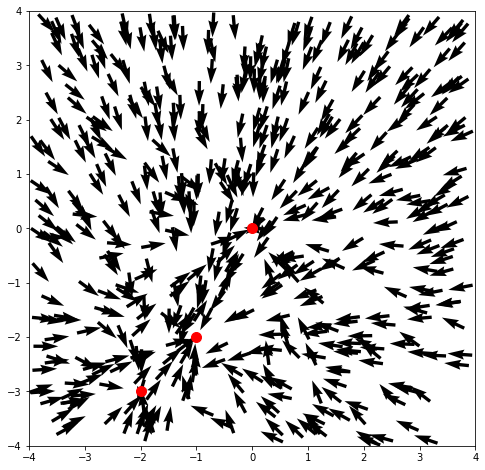

In [126]:

#fig = plt.figure()




ax = plt.axes()
ax.set_xlim([-4,4]);
ax.set_ylim([-4,4]);

scale_factor = .5

for i in range(len(X)):
    x0 = X[i,0]
    x1 = X[i,1]
    v0 = - scale_factor * Ugrad(X[i],A_list,Sigma_list)[0]
    v1 = - scale_factor * Ugrad(X[i],A_list,Sigma_list)[1]
    ax.quiver(x0,x1,v0,v1)

# attractors
att = [A_list[:,0],A_list[:,1]]
ax.scatter(att[0],att[1],color = 'red',marker = 'o',s = 100,alpha = 1)

plt.show()

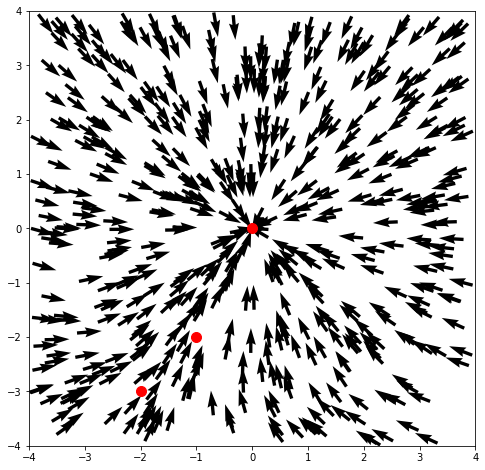

In [127]:

#fig = plt.figure()




ax = plt.axes()
ax.set_xlim([-4,4]);
ax.set_ylim([-4,4]);

scale_factor = .5


for i in range(len(X)):
    X[i,2] = 3

for i in range(len(X)):
    x0 = X[i,0]
    x1 = X[i,1]
    v0 = - scale_factor * Ugrad(X[i],A_list,Sigma_list)[0]
    v1 = - scale_factor * Ugrad(X[i],A_list,Sigma_list)[1]
    ax.quiver(x0,x1,v0,v1)

# attractors
att = [A_list[:,0],A_list[:,1]]
ax.scatter(att[0],att[1],color = 'red',marker = 'o',s = 100,alpha = 1)

plt.show()